#Klasifikacija animea po žanru bazirano na sinopsisu

In [1]:
!pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 33.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib Inline
import seaborn as sns
import pymongo

###Učitavanje podataka

In [3]:
dfanime = pd.read_json('/content/drive/MyDrive/anime_data.json')

In [4]:
dfanime['genres'] = dfanime['genres'].apply(lambda x: ', '.join([f"'{genre['name']}'" for genre in x]) if isinstance(x, list) else '')

In [5]:
dfanime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7268 entries, 0 to 7267
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       7268 non-null   object 
 1   id                        7268 non-null   int64  
 2   title                     7268 non-null   object 
 3   main_picture              7261 non-null   object 
 4   start_date                7268 non-null   object 
 5   end_date                  7255 non-null   object 
 6   synopsis                  7268 non-null   object 
 7   mean                      6954 non-null   float64
 8   rank                      6217 non-null   float64
 9   popularity                7268 non-null   int64  
 10  num_list_users            7268 non-null   int64  
 11  num_scoring_users         7268 non-null   int64  
 12  status                    7268 non-null   object 
 13  genres                    7268 non-null   object 
 14  num_epis

In [6]:
dfanime.head()

,_id,id,title,main_picture,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,status,genres,num_episodes,broadcast,average_episode_duration,rating,studios
0,{'$oid': '6475e0941f0050062bd10388'},1,Cowboy Bebop,{'medium': 'https://cdn.myanimelist.net/images...,1998-04-03,1999-04-24,"Crime is timeless. By the year 2071, humanity ...",8.75,40.0,43,1765279,910917,finished_airing,"'Action', 'Adult Cast', 'Award Winning', 'Sci-...",26,"{'day_of_the_week': 'saturday', 'start_time': ...",1440,r,"[{'id': 14, 'name': 'Sunrise'}]"
1,{'$oid': '6475e0971f0050062bd1038a'},5,Cowboy Bebop: Tengoku no Tobira,{'medium': 'https://cdn.myanimelist.net/images...,2001-09-01,2001-09-01,"Another day, another bounty—such is the life o...",8.38,191.0,601,359873,205667,finished_airing,"'Action', 'Adult Cast', 'Sci-Fi', 'Space'",1,NaN,6911,r,"[{'id': 4, 'name': 'Bones'}]"
2,{'$oid': '6475e09a1f0050062bd1038c'},6,Trigun,{'medium': 'https://cdn.myanimelist.net/images...,1998-04-01,1998-09-30,"Vash the Stampede is the man with a $$60,000,0...",8.22,325.0,246,724596,355436,finished_airing,"'Action', 'Adult Cast', 'Adventure', 'Sci-Fi',...",26,"{'day_of_the_week': 'thursday', 'start_time': ...",1480,pg_13,"[{'id': 11, 'name': 'Madhouse'}]"
3,{'$oid': '6475e09c1f0050062bd1038e'},7,Witch Hunter Robin,{'medium': 'https://cdn.myanimelist.net/images...,2002-07-03,2002-12-25,Robin Sena is a powerful craft user drafted in...,7.25,2798.0,1792,111663,42756,finished_airing,"'Action', 'Detective', 'Drama', 'Mystery', 'Su...",26,"{'day_of_the_week': 'wednesday', 'start_time':...",1500,pg_13,"[{'id': 14, 'name': 'Sunrise'}]"
4,{'$oid': '6475e09f1f0050062bd10390'},8,Bouken Ou Beet,{'medium': 'https://cdn.myanimelist.net/images...,2004-09-30,2005-09-29,It is the dark century and the people are suff...,6.94,4240.0,5114,14957,6392,finished_airing,"'Adventure', 'Fantasy', 'Shounen', 'Supernatural'",52,"{'day_of_the_week': 'thursday', 'start_time': ...",1380,pg,"[{'id': 18, 'name': 'Toei Animation'}]"


In [7]:
dfanime.dropna(subset = ['synopsis'], inplace=True)

In [8]:
dfanime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7268 entries, 0 to 7267
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       7268 non-null   object 
 1   id                        7268 non-null   int64  
 2   title                     7268 non-null   object 
 3   main_picture              7261 non-null   object 
 4   start_date                7268 non-null   object 
 5   end_date                  7255 non-null   object 
 6   synopsis                  7268 non-null   object 
 7   mean                      6954 non-null   float64
 8   rank                      6217 non-null   float64
 9   popularity                7268 non-null   int64  
 10  num_list_users            7268 non-null   int64  
 11  num_scoring_users         7268 non-null   int64  
 12  status                    7268 non-null   object 
 13  genres                    7268 non-null   object 
 14  num_epis

In [9]:
dfsyn = dfanime[['synopsis', 'genres']]

In [10]:
dfsyn

,synopsis,genres
0,"Crime is timeless. By the year 2071, humanity ...","'Action', 'Adult Cast', 'Award Winning', 'Sci-..."
1,"Another day, another bounty—such is the life o...","'Action', 'Adult Cast', 'Sci-Fi', 'Space'"
2,"Vash the Stampede is the man with a $$60,000,0...","'Action', 'Adult Cast', 'Adventure', 'Sci-Fi',..."
3,Robin Sena is a powerful craft user drafted in...,"'Action', 'Detective', 'Drama', 'Mystery', 'Su..."
4,It is the dark century and the people are suff...,"'Adventure', 'Fantasy', 'Shounen', 'Supernatural'"
...,...,...
7263,A recap episode of the first season of Rinne n...,"'Action', 'Comedy', 'Mecha', 'Sci-Fi'"
7264,An hour long OVA summarizing the plot of the o...,"'Comedy', 'Romance', 'Sci-Fi'"
7265,The continuation of Yurumates 3D right after t...,"'Comedy', 'Seinen', 'Slice of Life'"
7266,High schooler Nanami Momozono has quite a few ...,"'Comedy', 'Fantasy', 'Mythology', 'Romance', '..."


###Pretprocesiranje

In [11]:
#imprinting pprint for pretty printing
from pprint import pprint
#importing defaultdict
from collections import defaultdict
#saving total genres here.
hash_map = defaultdict(lambda: 0)
#saving each row's genre in genrelist
genrelist = []
for text in dfanime['genres']:
    templist = text[1:len(text)-1].split("', '")
    for i in range(len(templist)):
        if templist[i] == '':
            templist.pop(i)
            break
    genrelist.append(templist)
    for j in templist:
        hash_map[j] += 1
        
# Adding genrelist Column
dfsyn['genrelist'] = genrelist

pprint(len(hash_map))
pprint(hash_map)

76
defaultdict(<function <lambda> at 0x7f5151f5f760>,
            {'Action': 2033,
             'Adult Cast': 193,
             'Adventure': 1753,
             'Anthropomorphic': 74,
             'Avant Garde': 78,
             'Award Winning': 159,
             'Boys Love': 77,
             'CGDCT': 56,
             'Childcare': 30,
             'Combat Sports': 60,
             'Comedy': 2720,
             'Crossdressing': 22,
             'Delinquents': 28,
             'Detective': 158,
             'Drama': 1379,
             'Ecchi': 447,
             'Educational': 23,
             'Erotica': 29,
             'Fantasy': 1467,
             'Gag Humor': 102,
             'Girls Love': 58,
             'Gore': 69,
             'Gourmet': 35,
             'Harem': 216,
             'Hentai': 880,
             'High Stakes Game': 13,
             'Historical': 499,
             'Horror': 271,
             'Idols (Female)': 29,
             'Idols (Male)': 3,
             'Isekai': 69

<ipython-input-11-33513f4d29a5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsyn['genrelist'] = genrelist


<Axes: >

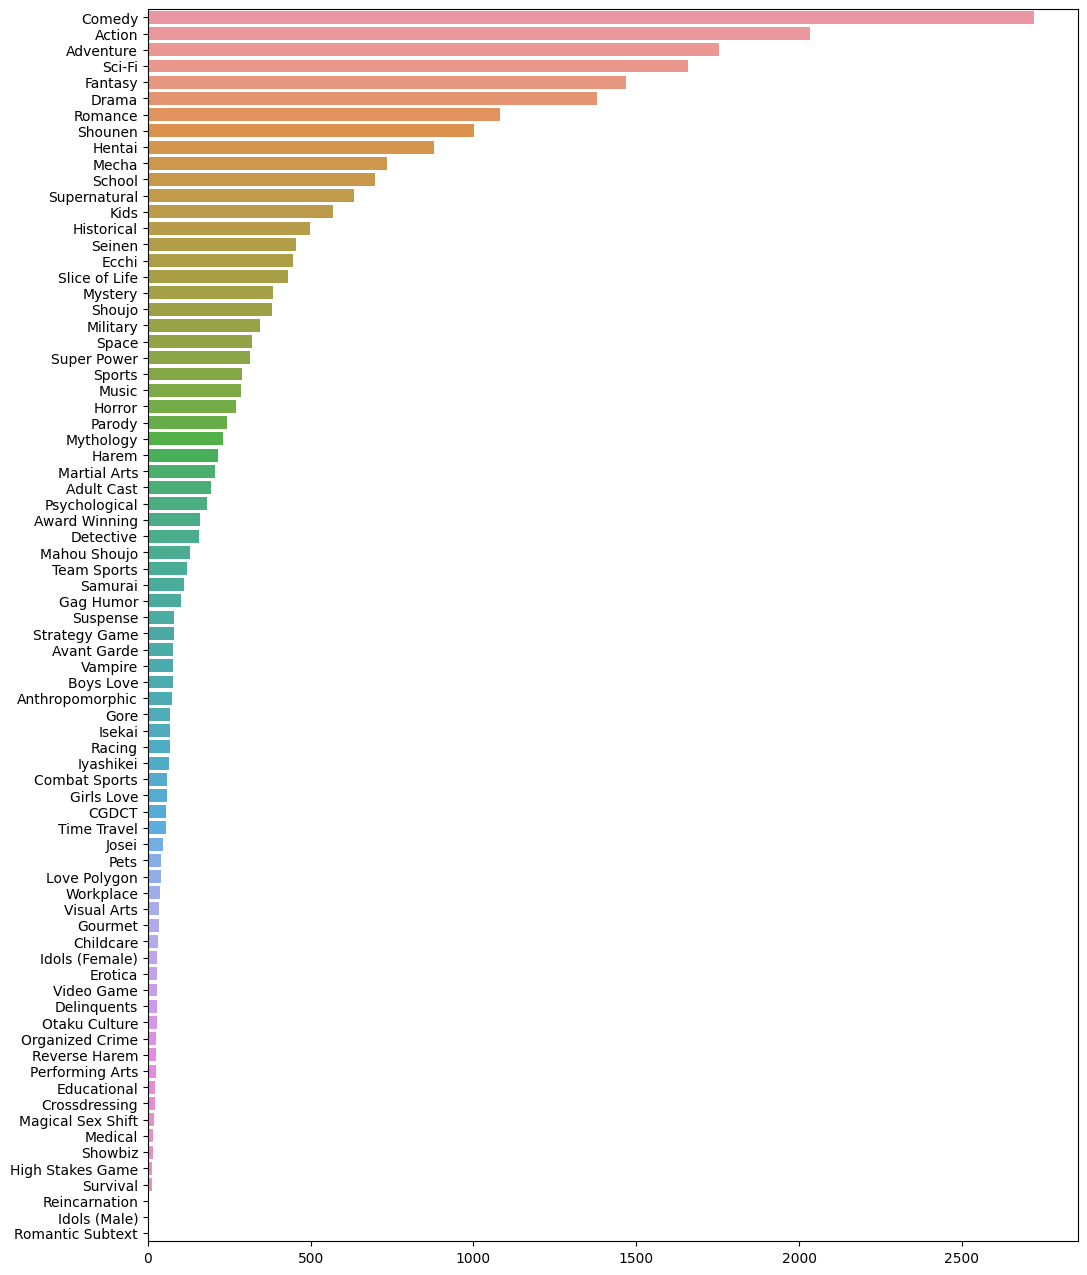

In [12]:
temp = list(hash_map.items())
temp.sort(key=lambda x: x[1], reverse=True)
plt.rcParams['figure.figsize'] = (12, 16)
y,x = [temp[i][0] for i in range(len(temp))], [temp[i][1] for i in range(len(temp))]
sns.barplot(x=x, y=y)

In [13]:
dfsyn.drop(columns=['genres'], inplace=True)

<ipython-input-13-0eccfe6bc060>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsyn.drop(columns=['genres'], inplace=True)


In [14]:
dfsyn

,synopsis,genrelist
0,"Crime is timeless. By the year 2071, humanity ...","[Action, Adult Cast, Award Winning, Sci-Fi, Sp..."
1,"Another day, another bounty—such is the life o...","[Action, Adult Cast, Sci-Fi, Space]"
2,"Vash the Stampede is the man with a $$60,000,0...","[Action, Adult Cast, Adventure, Sci-Fi, Shounen]"
3,Robin Sena is a powerful craft user drafted in...,"[Action, Detective, Drama, Mystery, Supernatural]"
4,It is the dark century and the people are suff...,"[Adventure, Fantasy, Shounen, Supernatural]"
...,...,...
7263,A recap episode of the first season of Rinne n...,"[Action, Comedy, Mecha, Sci-Fi]"
7264,An hour long OVA summarizing the plot of the o...,"[Comedy, Romance, Sci-Fi]"
7265,The continuation of Yurumates 3D right after t...,"[Comedy, Seinen, Slice of Life]"
7266,High schooler Nanami Momozono has quite a few ...,"[Comedy, Fantasy, Mythology, Romance, Shoujo]"


In [15]:
import re

# Function for cleaning the text
def clean_text(text):
    text = re.sub('\'', "", text)
    text = re.sub('[^a-zA-Z]', " ", text)
    text = text.lower()
    return text

In [16]:
dfsyn.loc[:, 'cleaned_syn'] = dfsyn.loc[:,'synopsis'].apply(clean_text)
dfsyn

<ipython-input-16-a3da63c4b57f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsyn.loc[:, 'cleaned_syn'] = dfsyn.loc[:,'synopsis'].apply(clean_text)


,synopsis,genrelist,cleaned_syn
0,"Crime is timeless. By the year 2071, humanity ...","[Action, Adult Cast, Award Winning, Sci-Fi, Sp...",crime is timeless by the year humanity ...
1,"Another day, another bounty—such is the life o...","[Action, Adult Cast, Sci-Fi, Space]",another day another bounty such is the life o...
2,"Vash the Stampede is the man with a $$60,000,0...","[Action, Adult Cast, Adventure, Sci-Fi, Shounen]",vash the stampede is the man with a ...
3,Robin Sena is a powerful craft user drafted in...,"[Action, Detective, Drama, Mystery, Supernatural]",robin sena is a powerful craft user drafted in...
4,It is the dark century and the people are suff...,"[Adventure, Fantasy, Shounen, Supernatural]",it is the dark century and the people are suff...
...,...,...,...
7263,A recap episode of the first season of Rinne n...,"[Action, Comedy, Mecha, Sci-Fi]",a recap episode of the first season of rinne n...
7264,An hour long OVA summarizing the plot of the o...,"[Comedy, Romance, Sci-Fi]",an hour long ova summarizing the plot of the o...
7265,The continuation of Yurumates 3D right after t...,"[Comedy, Seinen, Slice of Life]",the continuation of yurumates d right after t...
7266,High schooler Nanami Momozono has quite a few ...,"[Comedy, Fantasy, Mythology, Romance, Shoujo]",high schooler nanami momozono has quite a few ...


In [17]:
#importing nltk libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
### Python Script to remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('source')
words = defaultdict(lambda: 0)
def rem_stop(text):
    for i in text.split():
        new_text = []
        if i not in stop_words:
            new_text.append(i)
            words[i] += 1
    new_text = [i for i in text.split() if not i in stop_words]
    return ' '.join(new_text)

dfsyn.loc[:, 'cleaned_syn'] = dfsyn.loc[:, 'cleaned_syn'].apply(rem_stop)
dfsyn

<ipython-input-18-1c77438b1330>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsyn.loc[:, 'cleaned_syn'] = dfsyn.loc[:, 'cleaned_syn'].apply(rem_stop)


,synopsis,genrelist,cleaned_syn
0,"Crime is timeless. By the year 2071, humanity ...","[Action, Adult Cast, Award Winning, Sci-Fi, Sp...",crime timeless year humanity expanded across g...
1,"Another day, another bounty—such is the life o...","[Action, Adult Cast, Sci-Fi, Space]",another day another bounty life often unlucky ...
2,"Vash the Stampede is the man with a $$60,000,0...","[Action, Adult Cast, Adventure, Sci-Fi, Shounen]",vash stampede man bounty head reason hes merci...
3,Robin Sena is a powerful craft user drafted in...,"[Action, Detective, Drama, Mystery, Supernatural]",robin sena powerful craft user drafted stnj gr...
4,It is the dark century and the people are suff...,"[Adventure, Fantasy, Shounen, Supernatural]",dark century people suffering rule devil vande...
...,...,...,...
7263,A recap episode of the first season of Rinne n...,"[Action, Comedy, Mecha, Sci-Fi]",recap episode first season rinne lagrange
7264,An hour long OVA summarizing the plot of the o...,"[Comedy, Romance, Sci-Fi]",hour long ova summarizing plot original onegai...
7265,The continuation of Yurumates 3D right after t...,"[Comedy, Seinen, Slice of Life]",continuation yurumates right first season
7266,High schooler Nanami Momozono has quite a few ...,"[Comedy, Fantasy, Mythology, Romance, Shoujo]",high schooler nanami momozono quite problems l...


In [19]:
tmp = sorted(words, key = lambda x: words[x], reverse = True)

In [20]:
#total words
values = []
for i in tmp:
    values.append(words[i])
print(sum(values))

347768


<Axes: >

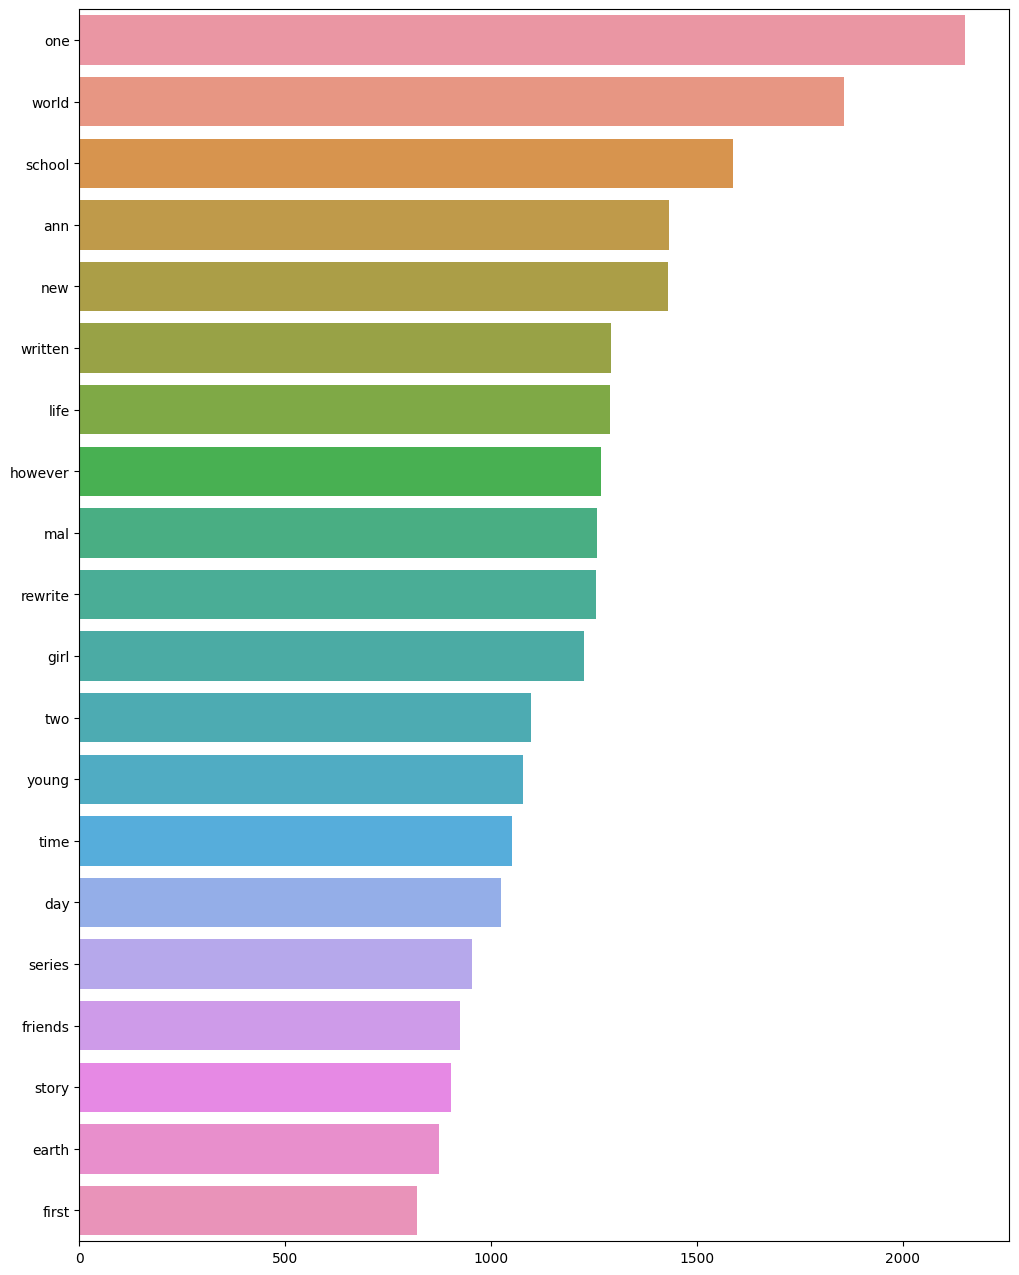

In [21]:
sns.barplot(x=values[:20], y=tmp[:20])

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(dfsyn['genrelist'])
y = multilabel_binarizer.transform(dfsyn['genrelist'])
print(y)

[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]]


In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(dfsyn['cleaned_syn'], y, test_size=0.2,random_state=69)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn import svm


model = LogisticRegression()
classif = OneVsRestClassifier(model)

In [26]:
classif.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [27]:
y_pred = classif.predict(xtest_tfidf)

In [28]:
f1_score(ytest, y_pred, average='micro')

0.2505854800936768

###Poboljšavanje modela

In [29]:
y_pred_prob = classif.predict_proba(xtest_tfidf)

In [30]:
y_pred_new = (y_pred_prob >= 0.20).astype(int)

In [31]:
f1_score(ytest, y_pred_new, average='micro')

0.497786151672162

###Tekst sa sinopsisom

In [32]:
with open('/content/drive/MyDrive/animesyn.txt', 'r+') as f:
    text = f.read()
text = clean_text(text)
text = rem_stop(text)
textx = tfidf_vectorizer.transform([text])
y = classif.predict(textx)
multilabel_binarizer.inverse_transform(y)

[('Action',)]